In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from matplotlib.font_manager import FontProperties
%matplotlib inline

In [52]:
df = pd.read_csv('CA_I405_bottleneck_13.51_train.csv')

In [53]:
df

,DateTime,Date,date_id,Time,Flow,Flow per lane,Flow per hour,Speed,Occupancy,Density
0,2019/4/1 0:00,2019/4/1,1,0:00,146,36.50,438,68.0,0.0354,9.3456
1,2019/4/1 0:05,2019/4/1,1,0:05,144,36.00,432,68.1,0.0356,9.3984
2,2019/4/1 0:10,2019/4/1,1,0:10,137,34.25,411,68.2,0.0336,8.8704
3,2019/4/1 0:15,2019/4/1,1,0:15,119,29.75,357,68.0,0.0309,8.1576
4,2019/4/1 0:20,2019/4/1,1,0:20,125,31.25,375,68.2,0.0323,8.5272
...,...,...,...,...,...,...,...,...,...,...
5755,2019/4/26 23:35,2019/4/26,26,23:35,205,51.25,615,69.1,0.0435,11.4840
5756,2019/4/26 23:40,2019/4/26,26,23:40,241,60.25,723,68.7,0.0413,10.9032
5757,2019/4/26 23:45,2019/4/26,26,23:45,207,51.75,621,69.3,0.0395,10.4280
5758,2019/4/26 23:50,2019/4/26,26,23:50,194,48.50,582,68.8,0.0393,10.3752


In [4]:
print(df.describe())

           date_id         Flow  Flow per lane  Flow per hour        Speed  \
count  5760.000000  5760.000000    5760.000000    5760.000000  5760.000000   
mean     13.500000   311.663194      77.915799     934.989583    56.097587   
std       7.953677   136.730042      34.182511     410.190127    15.088847   
min       1.000000    36.000000       9.000000     108.000000    23.400000   
25%       7.250000   202.000000      50.500000     606.000000    38.300000   
50%      13.500000   365.000000      91.250000    1095.000000    64.200000   
75%      19.750000   419.000000     104.750000    1257.000000    67.600000   
max      26.000000   551.000000     137.750000    1653.000000    75.500000   

         Occupancy      Density  
count  5760.000000  5760.000000  
mean      0.105489    27.849025  
std       0.074572    19.687046  
min       0.010400     2.745600  
25%       0.047875    12.639000  
50%       0.084700    22.360800  
75%       0.166525    43.962600  
max       0.360200    95.

In [42]:
len(df[df.date_id==1])

288

In [43]:
date_1=df[df.date_id==1]

In [45]:
date_1.head(5)

,DateTime,Date,date_id,Time,Flow,Flow per lane,Flow per hour,Speed,Occupancy,Density
0,2019/4/1 0:00,2019/4/1,1,0:00,146,36.50,438,68.0,0.0354,9.3456
1,2019/4/1 0:05,2019/4/1,1,0:05,144,36.00,432,68.1,0.0356,9.3984
2,2019/4/1 0:10,2019/4/1,1,0:10,137,34.25,411,68.2,0.0336,8.8704
3,2019/4/1 0:15,2019/4/1,1,0:15,119,29.75,357,68.0,0.0309,8.1576
4,2019/4/1 0:20,2019/4/1,1,0:20,125,31.25,375,68.2,0.0323,8.5272


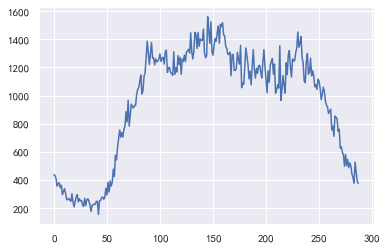

In [47]:
date_flow_1=np.array(date_1['Flow per hour'])
plt.figure()
plt.plot(date_flow_1)
plt.show()

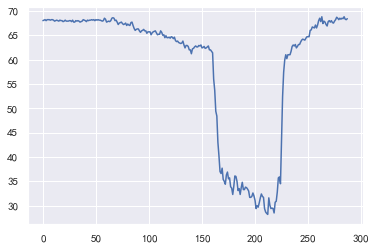

In [60]:
date_speed_1=np.array(date_1['Speed'])
plt.figure()
plt.plot(date_speed_1)
plt.show()

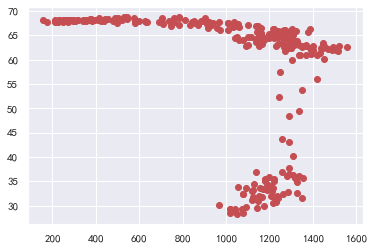

In [66]:
x=np.array(date_1['Flow per hour'])
y=np.array(date_1['Speed'])
plt.scatter(x,y,edgecolors='r',color='r',label ='outer layer',zorder=30)

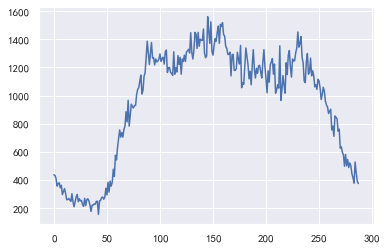

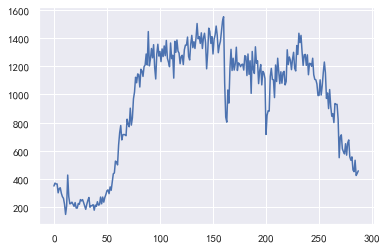

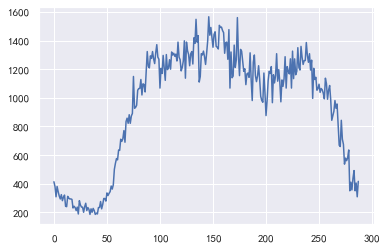

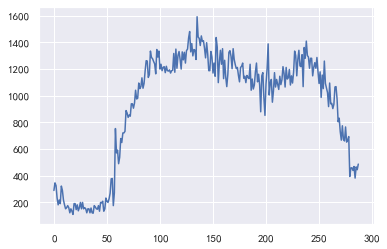

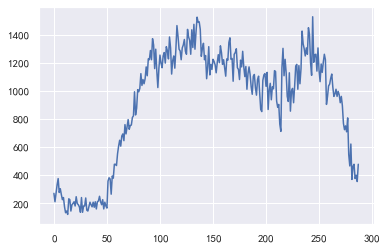

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


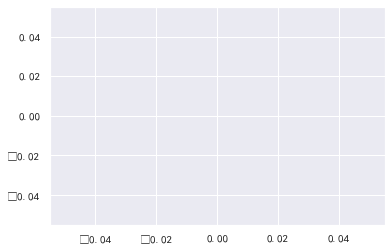

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


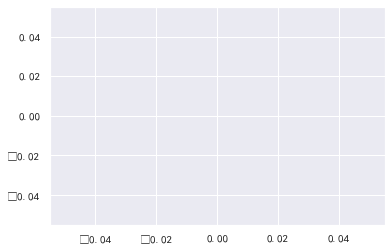

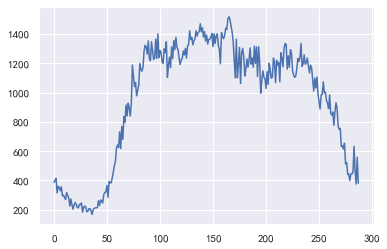

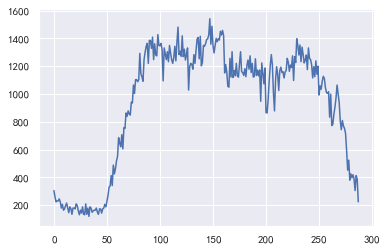

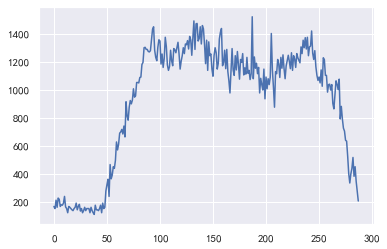

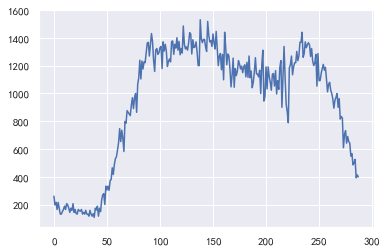

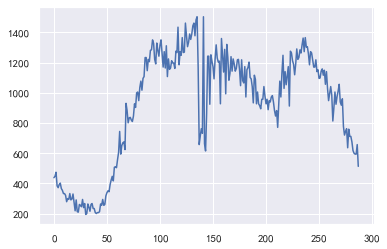

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


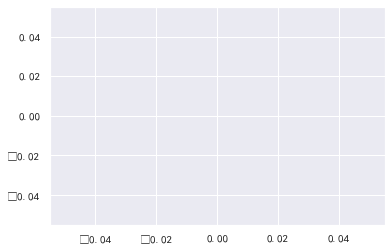

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


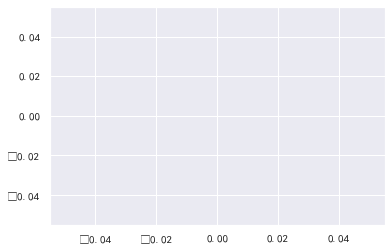

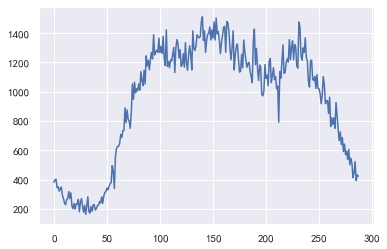

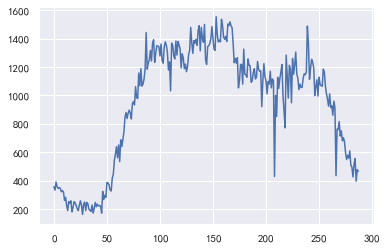

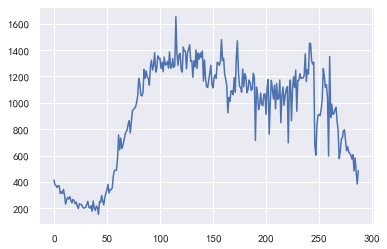

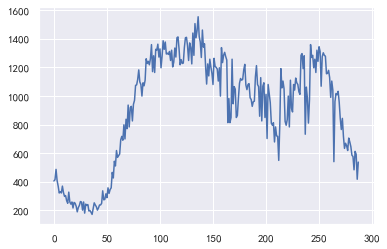

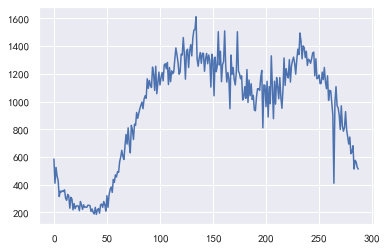

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


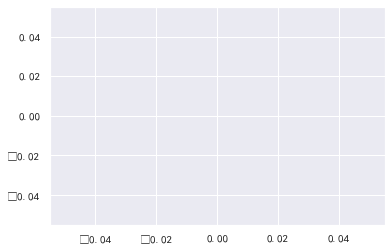

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


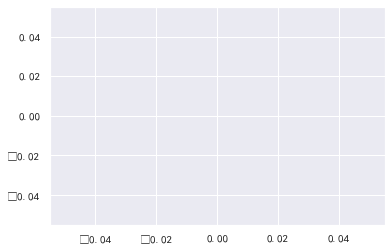

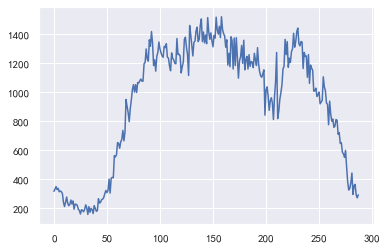

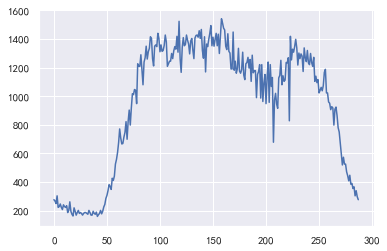

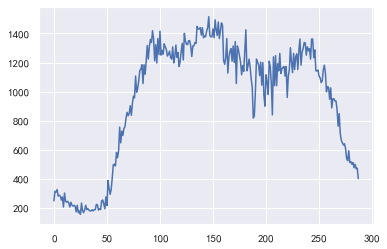

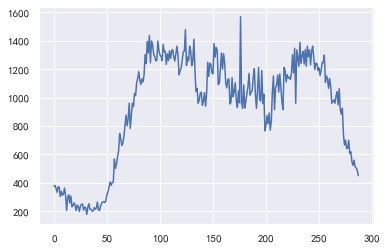

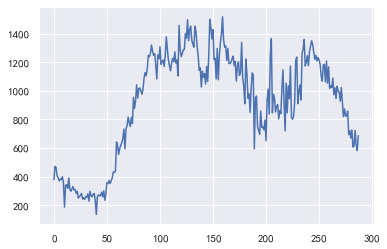

In [55]:
for i in range(26):
    date_flow_20=df[df.date_id==i+1]
    date_flow_i=np.array(date_flow_20['Flow per hour'])
    plt.figure()
    plt.plot(date_flow_i)
    plt.show()

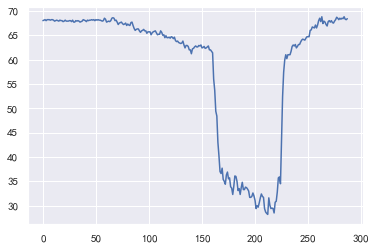

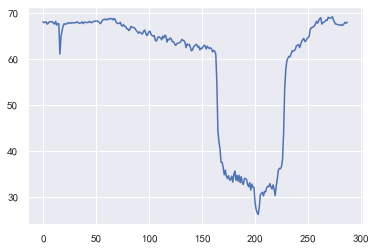

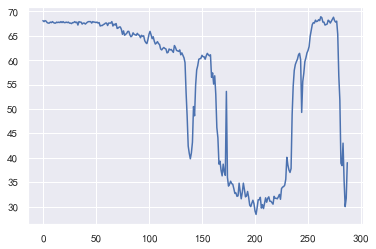

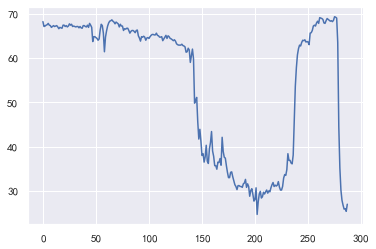

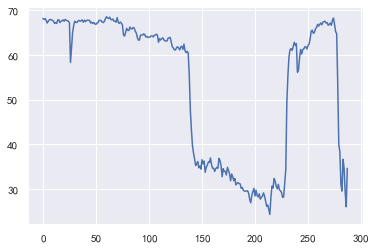

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


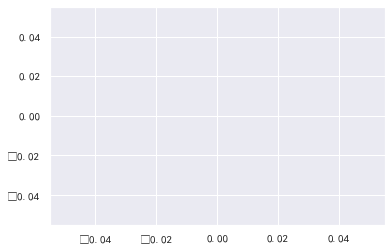

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


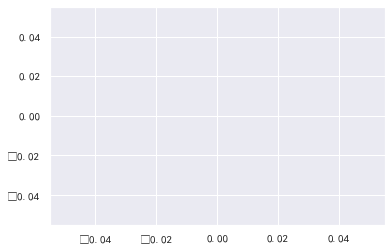

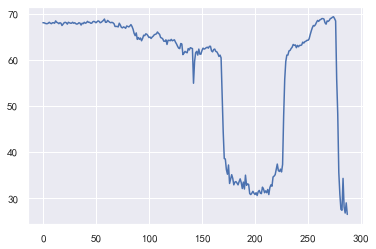

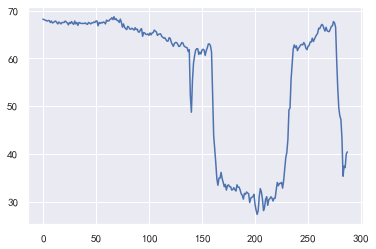

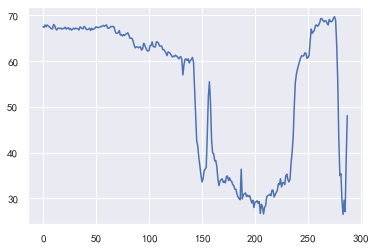

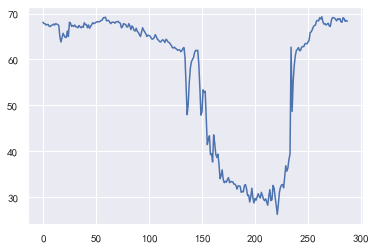

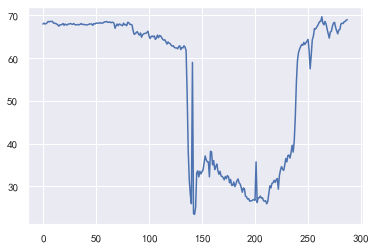

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


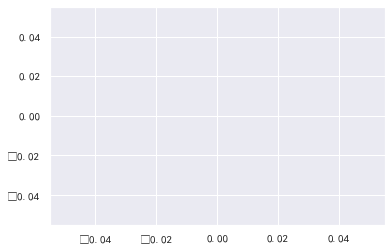

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


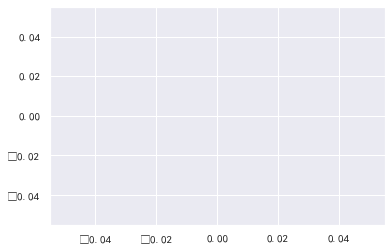

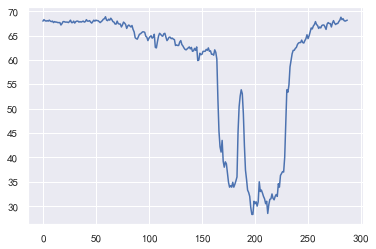

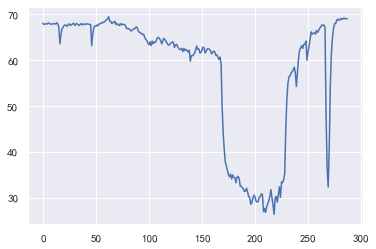

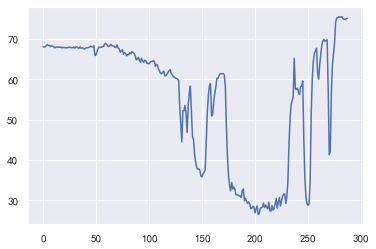

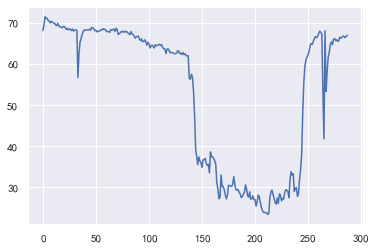

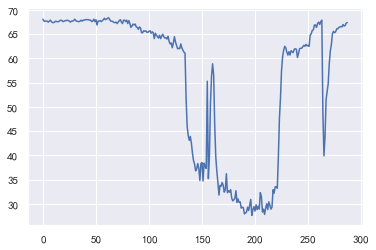

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


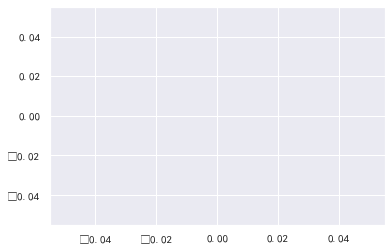

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


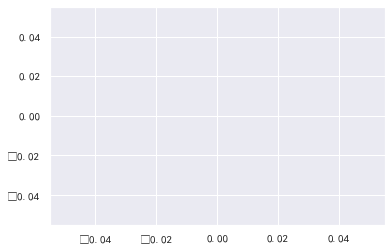

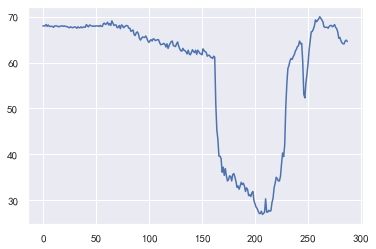

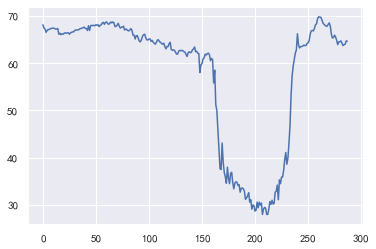

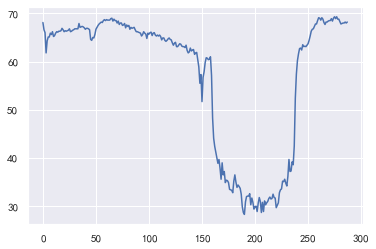

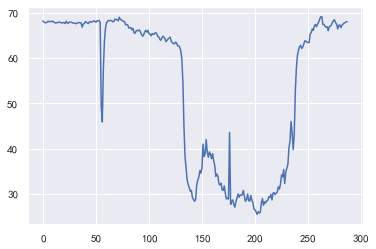

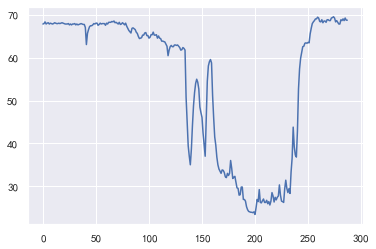

In [88]:
for i in range(26):
    date_speed_20=df[df.date_id==i+1]
    date_speed_i=np.array(date_speed_20['Speed'])
    plt.figure()
    plt.plot(date_speed_i)
    plt.show()

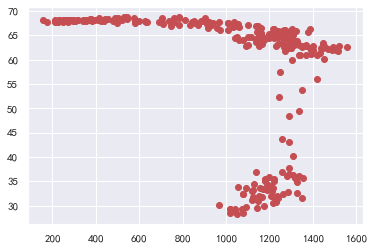

In [68]:
x=np.array(date_1['Flow per hour'])
y=np.array(date_1['Speed'])
plt.scatter(x,y,edgecolors='r',color='r',label ='outer layer',zorder=30)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


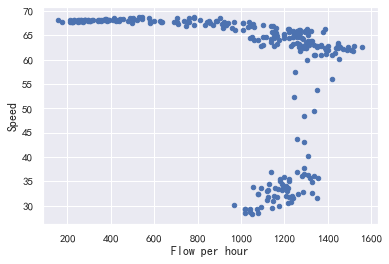

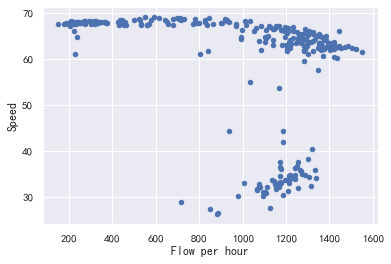

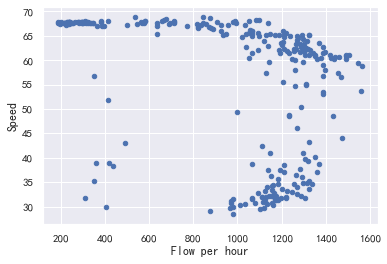

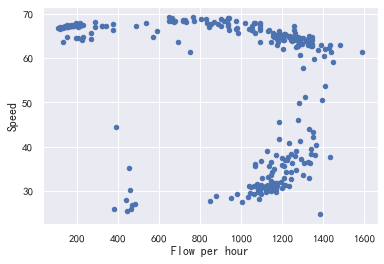

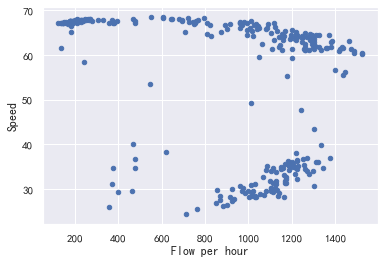

E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


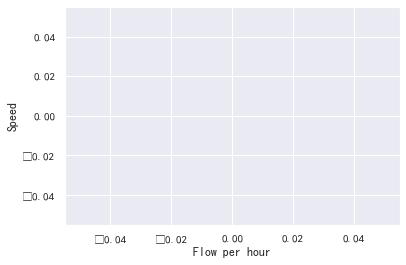

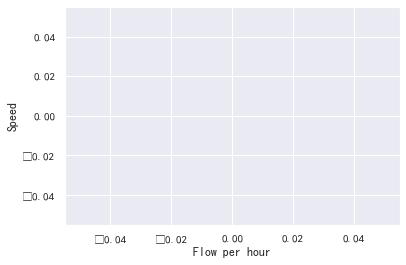

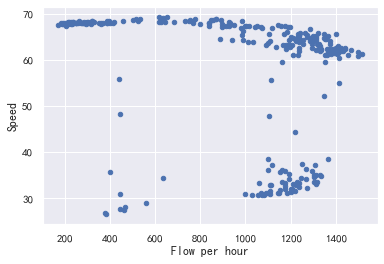

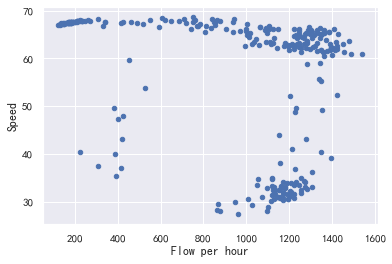

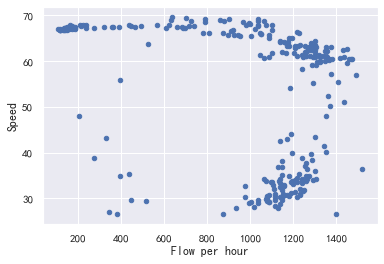

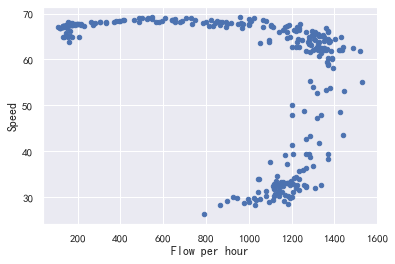

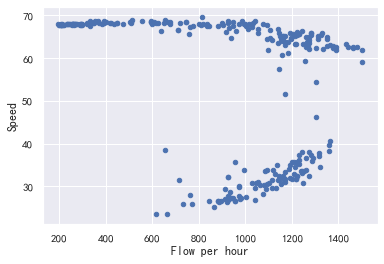

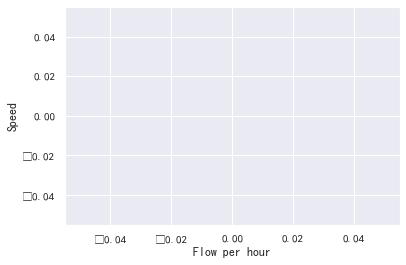

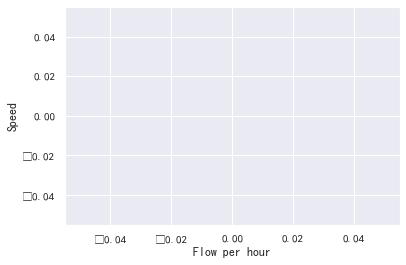

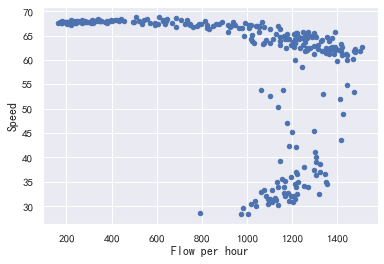

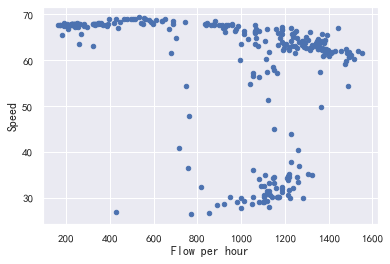

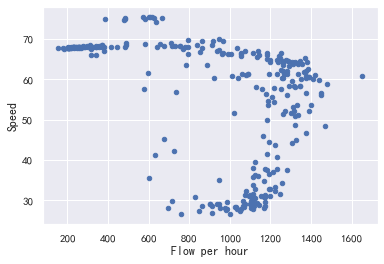

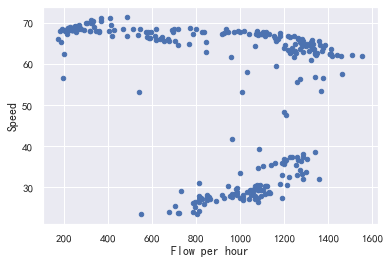

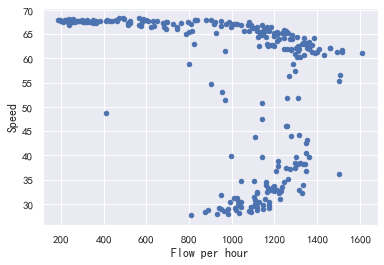

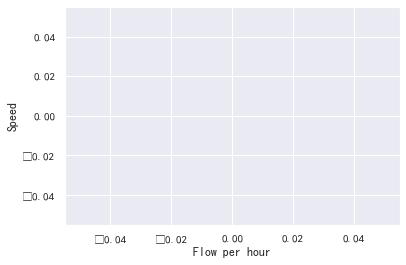

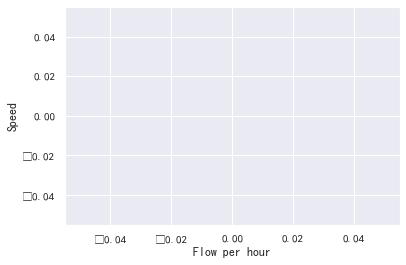

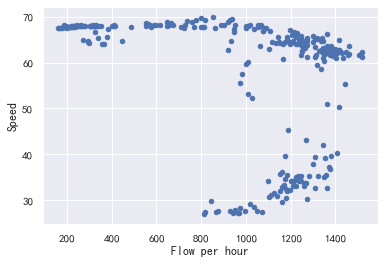

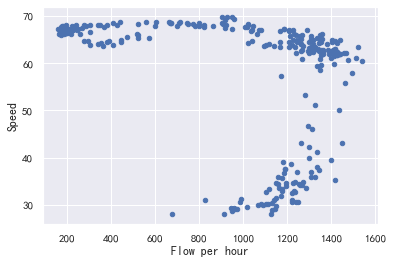

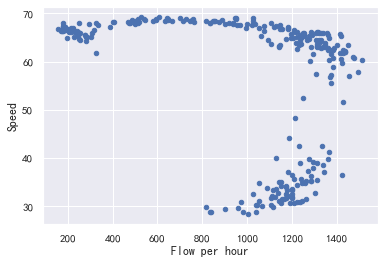

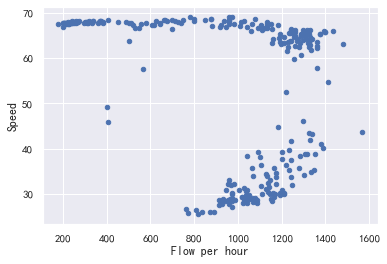

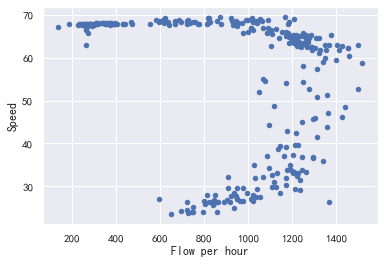

In [87]:
for i in range(26):
    date_flow_speed_20=df[df.date_id==i+1]
    a=date_flow_speed_20.loc[:,['Flow per hour','Speed']]
    a.plot(x='Flow per hour',y='Speed',kind='scatter')

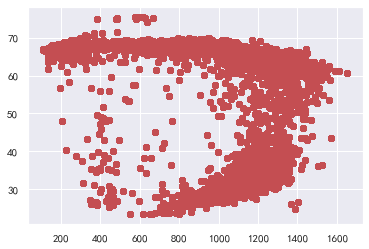

In [81]:
for i in range(26):
    date_flow_20=df[df.date_id==i+1]
    date_flow_i=np.array(date_flow_20['Flow per hour'])
    for j in range(26):
            date_speed_20=df[df.date_id==i+1]         
            date_speed_i=np.array(date_flow_20['Speed'])
            plt.scatter(date_flow_i,date_speed_i,edgecolors='r',color='r',label ='outer layer',zorder=30)  

In [56]:
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')

In [57]:
sns.set(font=myfont.get_name())

(array([220., 488., 269., 189., 111., 106., 136., 137., 148., 180., 235.,
        309., 463., 671., 774., 660., 446., 168.,  47.,   3.]),
 array([ 108.  ,  185.25,  262.5 ,  339.75,  417.  ,  494.25,  571.5 ,
         648.75,  726.  ,  803.25,  880.5 ,  957.75, 1035.  , 1112.25,
        1189.5 , 1266.75, 1344.  , 1421.25, 1498.5 , 1575.75, 1653.  ]),
 <BarContainer object of 20 artists>)

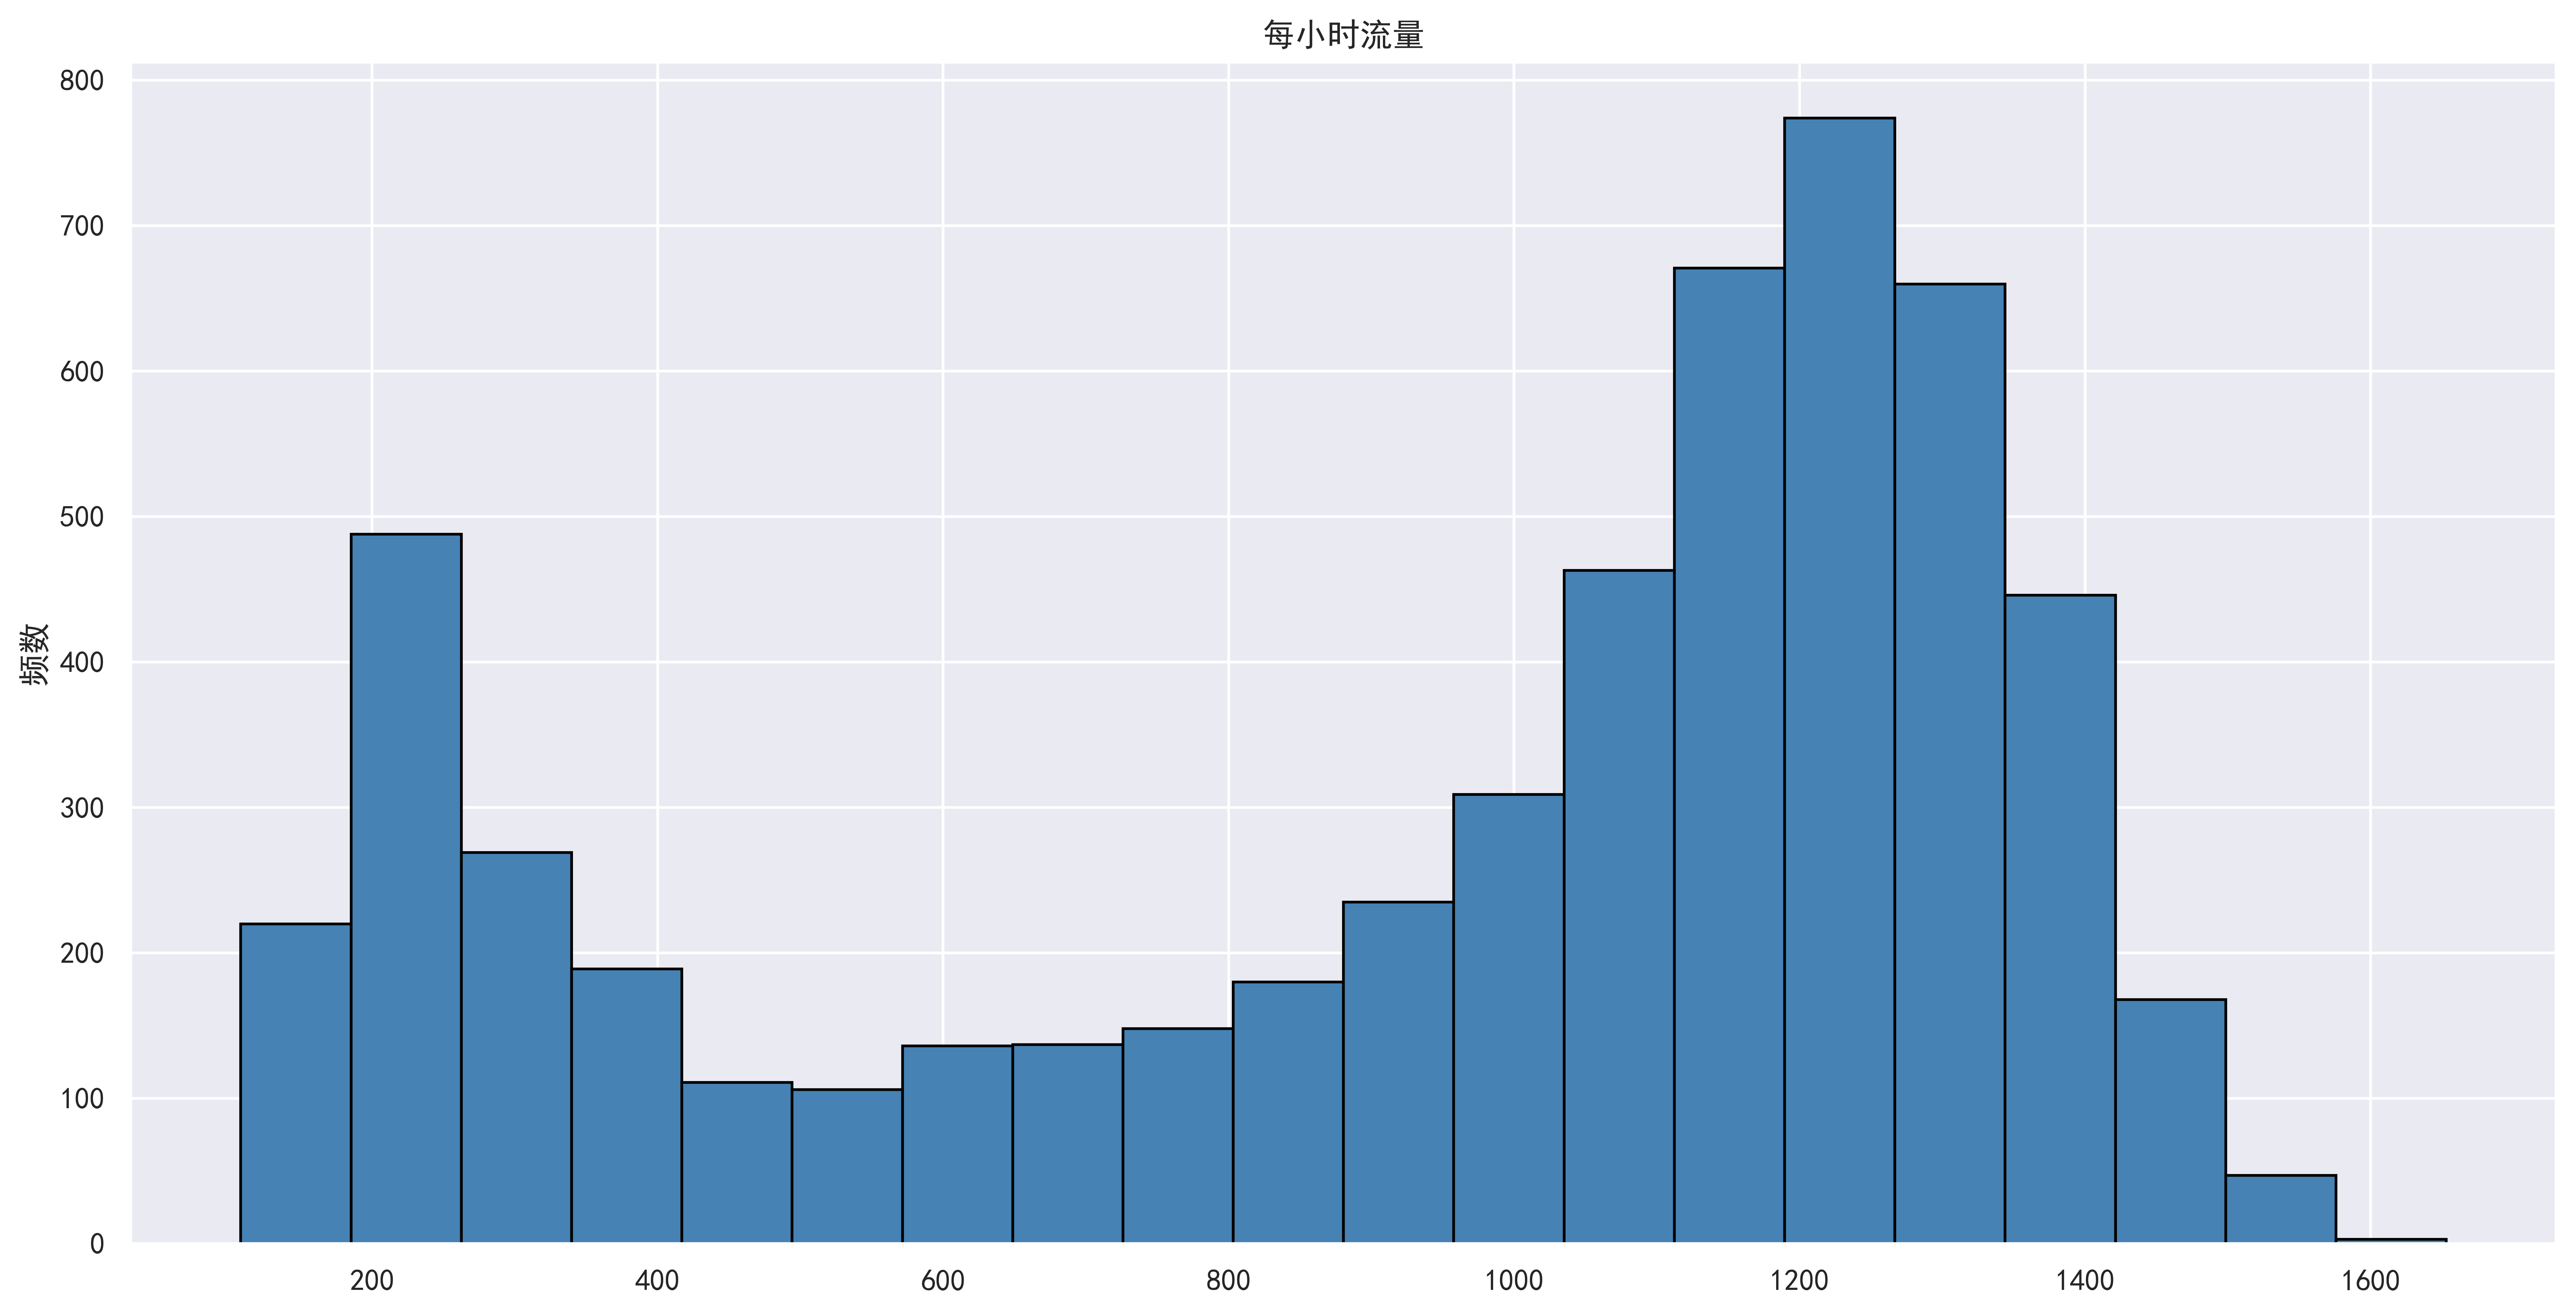

In [58]:
plt.figure(figsize=(16,8),dpi=600)
plt.ylabel('频数')
plt.title('每小时流量')
plt.hist(x = df['Flow per hour'], # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

Text(0.5, 1.0, '每小时流量')

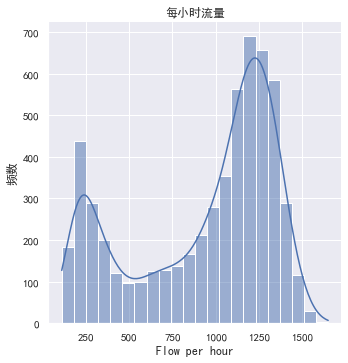

In [59]:
x=df['Flow per hour']
sns.displot(x,kde=True)
plt.ylabel('频数')
plt.title('每小时流量')

In [ ]:
hi9.plot(x="FLOW",y="SPEED",kind="scatter",color='B')